## Full Name: AmirMohammad Babaei
## Student ID: 402212399


# Introduction

In this practical assignment, we will practice using PyTorch to implement neural networks. We will work with the Fashion-MNIST dataset, and after visualizing the data to get familiar with it, we will use t-SNE and implement the PCA algorithm to reduce the dimensionality of the data for visualization in a 2D plot.

## Tasks

1. Implement the PCA algorithm.
2. Apply PCA and t-SNE to the Fashion-MNIST test set.
3. Train a simple stacked autoencoder consisting of several MLP layers.
4. Use PCA and t-SNE to visualize the encoding of the test set calculated by the trained autoencoder.
5. Add a classification layer on top of the autoencoder's encoder and use its trained weights to predict each image label.

## Instructions

1. For task 1, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the PCA class.
    c. Instantiate the PCA class and fit it to the Fashion-MNIST test set.
    d. Transform the Fashion-MNIST test set using the fitted PCA model.

2. For task 2, you can use the following steps:

    a. Import the necessary libraries.
    b. Instantiate the PCA and t-SNE classes.
    c. Transform the Fashion-MNIST test set using the PCA model.
    d. Transform the PCA-transformed Fashion-MNIST test set using the t-SNE model.
    e. Visualize the t-SNE-transformed Fashion-MNIST test set using a scatter plot.

3. For task 3, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the stacked autoencoder class.
    c. Instantiate the stacked autoencoder class and train it on the Fashion-MNIST training set.

4. For task 4, you can use the following steps:

    a. Transform the Fashion-MNIST test set using the PCA model.
    b. Transform the PCA-transformed Fashion-MNIST test set using the trained autoencoder's encoder.
    c. Visualize the t-SNE-transformed encoding of the Fashion-MNIST test set using a scatter plot.

5. For task 5, you can use the following steps:

    a. Import the necessary libraries.
    b. Define the classification layer class.
    c. Add the classification layer to the trained autoencoder's encoder.
    d. Train the classification layer on the Fashion-MNIST training set.
    e. Evaluate the classification layer on the Fashion-MNIST test set.

## Conclusion

In this practical assignment, we have learned how to use PyTorch to implement neural networks and apply dimensionality reduction techniques to data visualization. We have also learned how to train and evaluate classification models.


# Import Requirements

In [1]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from random import sample

# Config

In [2]:
RANDOM_STATE = 42
random.seed(RANDOM_STATE)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Load Fashion MNIST Dataset

In [4]:
fashion_mnist = fetch_openml(name='Fashion-MNIST')

X, y = fashion_mnist.data.astype('float32'), fashion_mnist.target.astype('int')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [5]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress",
    "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [6]:
print(X.shape)

(70000, 784)


In [7]:
print(y.shape)

(70000,)


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.1, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.075, random_state=RANDOM_STATE)

print(f'Shape of Training Data: {X_train.shape}')
print(f'Shape of Test Data: {X_test.shape}')
print(f'Shape of Validation Data: {X_val.shape}')

Shape of Training Data: (58275, 784)
Shape of Test Data: (7000, 784)
Shape of Validation Data: (4725, 784)


# Visualization

In [9]:
def visualize_one_image_per_category(X, y, class_names):
    unique_labels = np.unique(y)
    fig, ax = plt.subplots(1, len(unique_labels), figsize=(20, 4))

    for i, label in enumerate(unique_labels):
        # Find the first image for the current label
        image_idx = np.where(y == label)[0][0]
        image = X.iloc[image_idx].values.reshape(28, 28)  # Use .iloc to access by index

        ax[i].imshow(image, cmap='gray')
        ax[i].set_title(class_names[label])
        ax[i].axis('off')

    plt.show()

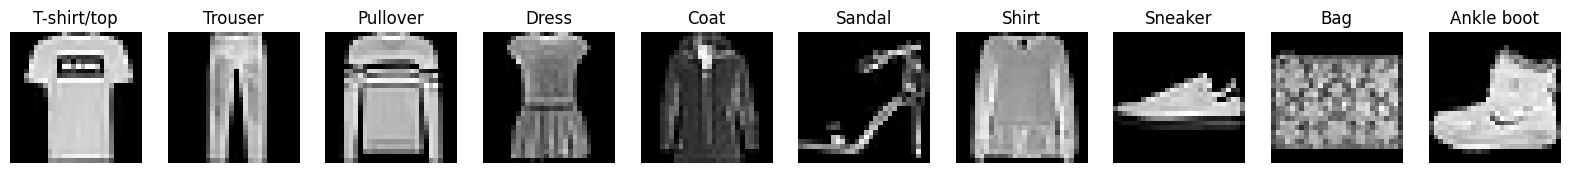

In [10]:
visualize_one_image_per_category(X, y, class_names)


# Dimensionality Reduction

In [11]:
def visualize_2d(reduced_data, labels, method='PCA', class_names=class_names):
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', alpha=0.5, s=5)
    plt.title(f'{method} Visualization')
    plt.xlabel(f'{method} Component 1')
    plt.ylabel(f'{method} Component 2')

    plt.colorbar(scatter, ticks=np.arange(len(class_names)), label='Class',
                 format=plt.FuncFormatter(lambda val, loc: class_names[int(val)]))

    for i, label in enumerate(class_names):
        indices = labels == i
        plt.text(reduced_data[indices, 0].mean(), reduced_data[indices, 1].mean(),
                 label, fontsize=10, ha='center', va='center')

    plt.show()

#### For this part and the following part, apply PCA and t-SNE to test dataset, respectively.

## PCA (10 points)

### Principal Component Analysis (PCA) - Step-by-Step Explanation

Principal Component Analysis (PCA) is a technique used for dimensionality reduction and data visualization. It aims to transform a dataset into a new coordinate system (a lower-dimensional space) while retaining the most important information.

1. **Center the Data**:
   - Calculate the mean of each feature in the dataset.
   - Subtract the mean from each feature value to center the data around the origin. This ensures that the new coordinate system is centered at the origin.

2. **Calculate Covariance Matrix**:
   - Compute the covariance matrix for the centered data.
   - The covariance matrix provides information about how features vary with each other.

3. **Calculate Eigenvectors and Eigenvalues**:
   - Compute the eigenvectors and eigenvalues of the covariance matrix.
   - Eigenvectors represent the directions of maximum variance, and eigenvalues quantify the amount of variance in those directions.

4. **Sort Eigenvectors**:
   - Sort the eigenvectors based on their corresponding eigenvalues in descending order.
   - The eigenvectors with higher eigenvalues capture more variance and are prioritized.

5. **Select Principal Components**:
   - Choose the top `n` eigenvectors (principal components) based on the desired number of dimensions for the reduced dataset.
   - These eigenvectors represent the directions in the original feature space that capture the most variance.

6. **Project Data**:
   - Project the centered data onto the lower-dimensional subspace formed by the selected principal components.
   - Multiply the centered data by the selected eigenvectors to obtain the new representation in the lower-dimensional space.

7. **Transform the Original Data:**:
   - Multiply the original data by the projection matrix to obtain the new lower-dimensional representation of the data.




PCA helps in reducing the dimensionality of the dataset while retaining the most critical information. The first few principal components capture the majority of the variance, allowing for effective visualization and analysis of the data in a lower-dimensional space.


In [12]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.proj_matrix = None

    def standard_data(self, X):
        X_np = X.copy()
        X_feat_mean = X_np.mean(axis=0)
        X_centered_np = X_np - X_feat_mean
        return X_centered_np

    def fit(self, X):
        # Center the data
        X_centered_np = self.standard_data(X)

        # Calculate the covariance matrix
        cov_matrix = (X_centered_np.T @ X_centered_np) / (X_centered_np.shape[0] - 1)

        # Calculate the eigenvectors and eigenvalues of the covariance matrix
        eig_values, eig_vectors = np.linalg.eig(cov_matrix)

        # Sort eigenvectors based on eigenvalues in descending order
        eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        self.proj_matrix = np.hstack([eig_vector.reshape(-1, 1) for _, eig_vector in eig_pairs[:self.n_components]])


    def transform(self, X):
        # Center the data
        X_centered_np = self.standard_data(X)

        # Project the data onto the lower-dimensional subspace
        if self.proj_matrix is None:
            raise "`fit` method should be called before transform method"

        X_proj_np = X_centered_np @ self.proj_matrix
        return X_proj_np

    def fit_transform(self, X):
        # Fit, then transform :)
        self.fit(X)
        return self.transform(X)

## Apply `PCA` and `t-SNE` to the testset.

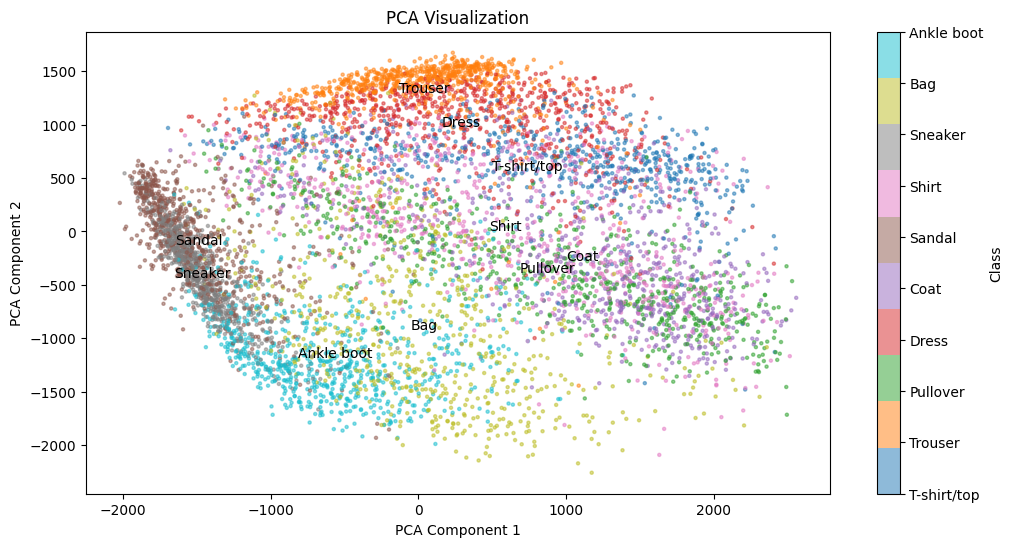

In [13]:
pca = PCA(2)
X_pca = pca.fit_transform(X_test)
visualize_2d(X_pca, y_test, 'PCA')

## t-SNE

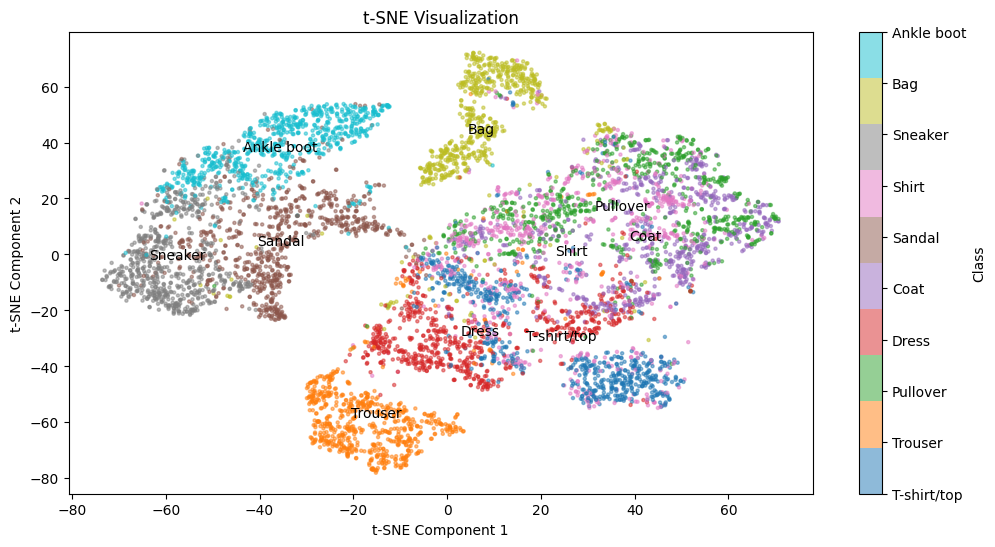

In [14]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
X_tsne = tsne.fit_transform(X_test)
visualize_2d(X_tsne, y_test, 't-SNE')

## **Question:** (10 points)

- Explain the differences between PCA (Principal Component Analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) in terms of their preservation of distance, handling of non-linearity, and preservation of data structure. How does each technique aim to maintain distance or similarity relationships between data points in the lower-dimensional space, handle non-linear relationships in the data, and preserve the global or local data structure? Provide examples or illustrations to support your explanation.

## Solution:
PCA and t-SNE are both dimensionality reduction techniques, but they differ in their approach to preserving distance, handling non-linearity, and preserving data structure. Here are the differences between PCA and t-SNE:

Preservation of distance:
- PCA aims to preserve large pairwise distances to maximize variance, while t-SNE focuses on preserving small pairwise distances to maintain the relationships between data points in a lower-dimensional space[1][5].
- PCA is a linear technique, while t-SNE is a non-linear technique that can handle non-linear datasets[6].

Handling of non-linearity:
- PCA assumes that the data is linearly related, while t-SNE does not make any assumptions about the data and can handle non-linear relationships[1][4][6].
- PCA tries to reduce dimensionality by maximizing variance in the data, while t-SNE tries to keep similar data points together and dissimilar data points apart[4].

Preservation of data structure:
- PCA only aims to retain the global variance of the data, so local relationships such as clusters are often lost after projection[5].
- t-SNE preserves local relationships, so data points in a cluster in the original high-dimensional space will still be close to each other in the lower-dimensional space[1][5].

To illustrate the differences between PCA and t-SNE, consider the following example. Suppose we have a dataset of handwritten digits, where each digit is represented by a vector of pixel values. PCA would try to find the directions of maximum variance in the dataset, which may not necessarily correspond to the differences between the digits. On the other hand, t-SNE would try to preserve the pairwise similarities between the digits, so similar digits would be close to each other in the lower-dimensional space. This would result in a visualization where digits that look similar (e.g. 0 and 6) are close to each other, while digits that look dissimilar (e.g. 1 and 8) are far apart[1].

In summary, PCA and t-SNE have different mechanisms and work best with different types of data. PCA is a linear technique that focuses on preserving variance, while t-SNE is a non-linear technique that focuses on preserving relationships between data points. PCA is good for visualizing the global structure of the data, while t-SNE is good for visualizing the local structure of the data.

Citations: \
[1] https://www.datacamp.com/tutorial/introduction-t-sne \
[2] https://www.kaggle.com/code/agsam23/pca-vs-t-sne \
[3] https://datascience.stackexchange.com/questions/99485/theoretical-differences-between-kpca-and-t-sne \
[4] https://towardsdatascience.com/how-t-sne-outperforms-pca-in-dimensionality-reduction-7a3975e8cbdb \
[5] https://www.blog.dailydoseofds.com/p/the-ultimate-comparison-between-pca \
[6] https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/




# Deep Auto-Encoder For Representation Learning

In the previous section, you observed the results of applying two renowned dimensionality reduction techniques to the data. Additionally, a representation of the data can be learned by an **autoencoder**, which is a neural network that takes an image (or a noisy version of it) as input and attempts to reconstruct the image after encoding the pixels.

## Create Dataset & Datalodaer (5 points)

- Note: If you are unfamiliar with PyTorch's `Dataset`, `Transforms`, and `Dataloader` modules, consult the following link for assistance: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [15]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import v2

class CustomFashionMNISTDataset(Dataset):
    def __init__(self, X, y, transform):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        assert self.X.shape[0] == self.y.shape[0]
        return self.X.shape[0]

    def __getitem__(self, idx):
        if self.transform is None:
            image, label = torch.Tensor(self.X[idx].reshape(28, 28, 1)), F.one_hot(torch.from_numpy(self.y).to(torch.long), 10)[idx]
        else:
            image, label = self.transform(self.X[idx].reshape(28, 28, 1)), F.one_hot(torch.from_numpy(self.y).to(torch.long), 10)[idx]

        return image, label


BATCH_SIZE = 128
train_transform = transforms.Compose([
    transforms.ToTensor(),
    v2.Lambda(lambda x: x / 255.),
    transforms.Normalize([0.5], [0.5])
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    v2.Lambda(lambda x: x / 255.),
    transforms.Normalize([0.5], [0.5])
])


train_dataset = CustomFashionMNISTDataset(X_train, y_train, train_transform)
val_dataset = CustomFashionMNISTDataset(X_val, y_val, test_transform)
test_dataset = CustomFashionMNISTDataset(X_test, y_test, test_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [16]:
for x, y in train_loader:
    print(f'{y.shape=}')
    break

y.shape=torch.Size([128, 10])


## Define Model (5 points)

**Caution:** You may only use multilayer perceptron (MLP) layers.

- Note: If you are unfamiliar with custom models using PyTorch, consult the following link for assistance:
https://pytorch.org/tutorials/beginner/examples_nn/polynomial_module.html

In [17]:
import torch.nn.functional as F
from torch import nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 500),
            nn.ReLU(True),
            nn.Linear(500, 250),
            nn.ReLU(True),
            nn.Linear(250, 128),
            nn.ReLU(True),
            nn.Linear(128, 64))
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 250),
            nn.ReLU(True),
            nn.Linear(250, 500),
            nn.ReLU(True),
            nn.Linear(500, 28 * 28),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

autoencoder = Autoencoder()
autoencoder.to(device)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=250, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=250, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=250, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=500, out_features=784, bias=True)
    (7): Tanh()
  )
)

## Trainin Loop (10 points)

#### Complete the `train_at_epoch`, `test_ae`, and `train_ae` functions.

#### Define your `Optimizer`, `Learning Rate Scheduler`, and `Criterion` inside the `train_ae` function.


In [18]:
from torch import optim

def train_ae_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    # TODO
    mean_loss = 0.0

    for img, _ in train_loader:
        optimizer.zero_grad()
        img = img.to(device)
        img = img.view(img.size(0), -1)

        output = model(img)
        loss = criterion(output, img)

        loss.backward()
        optimizer.step()
        mean_loss += loss.item()
        # print(f'Batch Loss: {loss.item()}')

    mean_loss = mean_loss / len(train_loader)
    scheduler.step()

    return mean_loss

def test_ae(model, test_loader, criterion, device):
    model.eval()
    # TODO
    mean_loss = 0.0

    with torch.no_grad():
        for img, _ in test_loader:
            img = img.to(device)
            img = img.view(img.size(0), -1)
            output = model(img)
            loss = criterion(output, img)
            mean_loss += loss.item()

    mean_loss = mean_loss / len(test_loader)
    return mean_loss

def train_ae(model, train_loader, val_loader, num_epochs, device=device):
    # TODO
    learning_rate = 1e-3
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
    train_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        train_loss = train_ae_epoch(model, train_loader, criterion, optimizer, scheduler, device)
        val_loss = test_ae(model, val_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)

    return train_loss_history, val_loss_history

In [19]:
ae_train_loss_history, ae_val_loss_history = train_ae(autoencoder, train_loader, val_loader, 50)

Epoch 1/50, Train Loss: 0.1307, Val Loss: 0.0804
Epoch 2/50, Train Loss: 0.0736, Val Loss: 0.0687
Epoch 3/50, Train Loss: 0.0640, Val Loss: 0.0604
Epoch 4/50, Train Loss: 0.0575, Val Loss: 0.0560
Epoch 5/50, Train Loss: 0.0534, Val Loss: 0.0523
Epoch 6/50, Train Loss: 0.0506, Val Loss: 0.0502
Epoch 7/50, Train Loss: 0.0484, Val Loss: 0.0485
Epoch 8/50, Train Loss: 0.0465, Val Loss: 0.0472
Epoch 9/50, Train Loss: 0.0452, Val Loss: 0.0455
Epoch 10/50, Train Loss: 0.0438, Val Loss: 0.0452
Epoch 11/50, Train Loss: 0.0410, Val Loss: 0.0418
Epoch 12/50, Train Loss: 0.0404, Val Loss: 0.0415
Epoch 13/50, Train Loss: 0.0398, Val Loss: 0.0412
Epoch 14/50, Train Loss: 0.0393, Val Loss: 0.0407
Epoch 15/50, Train Loss: 0.0387, Val Loss: 0.0400
Epoch 16/50, Train Loss: 0.0382, Val Loss: 0.0394
Epoch 17/50, Train Loss: 0.0377, Val Loss: 0.0392
Epoch 18/50, Train Loss: 0.0372, Val Loss: 0.0387
Epoch 19/50, Train Loss: 0.0367, Val Loss: 0.0385
Epoch 20/50, Train Loss: 0.0363, Val Loss: 0.0379
Epoch 21/

### **Advantages of Using PyTorch Lightning for Training Neural Networks**

When working on training neural networks, it's essential to choose the right tools and frameworks to ensure efficient development, robustness, and maintainability of the code. PyTorch Lightning is a popular and powerful framework that simplifies the training process and offers several advantages over writing the training loop from scratch. In this exercise, we will explore these benefits by comparing manual implementation with PyTorch Lightning.

1. **Structured and Readable Code:**
PyTorch Lightning enforces a clear structure by separating the PyTorch components (such as model, optimizer, and scheduler) into dedicated methods like training_step, validation_step, and configure_optimizers. This separation results in more readable and organized code, making it easier to understand and maintain.

2. **Reduced Boilerplate Code:**
Writing a training loop involves a significant amount of boilerplate code for handling various aspects of training, such as iterating over the dataset, updating parameters, and logging metrics. PyTorch Lightning abstracts away much of this boilerplate, allowing you to focus on the essential components of your model and experiment.

3. **Flexibility and Customization:**
Despite providing a high-level interface, PyTorch Lightning remains flexible and allows for customization. Users can override specific methods to tailor the training process to their needs while leveraging the standardized structure provided by the framework.

4. **Enhanced Reproducibility:**
PyTorch Lightning promotes code modularity and follows best practices, contributing to enhanced reproducibility. With a consistent structure across experiments, it becomes easier to replicate and compare results.

5. **Integration with Advanced Features:**
PyTorch Lightning seamlessly integrates with advanced features such as distributed training, mixed-precision training, and automatic optimization, among others. These features are often complex to implement manually but can be easily utilized with PyTorch Lightning.

In summary, PyTorch Lightning provides a high-level and well-structured interface for training neural networks, offering benefits such as code readability, reduced boilerplate, flexibility, reproducibility, integration with advanced features, and a vibrant community. By using PyTorch Lightning, we can expedite the development process, enhance code quality, and facilitate experimentation and research in the field of deep learning.**

## Migrate to PL

#### In addition to all components defined in the preceding training phase, incorporate the early stopping module from the PyTorch Lightning API and a model checkpoint that saves the best model in each epoch.

In [34]:
! pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 66.5 MB/s eta 0:00:00


### Complete The Code For the PL Trainer (15 point)

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

class AE_Trainer(pl.LightningModule):
    def __init__(self, model):
        super(AE_Trainer, self).__init__()
        self.model = model
        self.learning_rate = 1e-2
        self.criteria = nn.MSELoss()
        self.train_losses = []
        self.val_losses = []
        self.training_step_outputs = []
        self.validation_step_outputs = []
        # TODO

    def forward(self, x):
        # TODO
        x = x.view(x.size(0), -1)
        x = self.model(x)
        return x

    def training_step(self, batch, batch_idx):
        # TODO
        x, _ = batch
        x = x.view(x.size(0), -1)

        output = self.model(x)
        loss = self.criteria(output, x)
        self.log('train_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        self.training_step_outputs.append(loss)
        return loss

    def on_train_epoch_end(self):
        # TODO
        avg_loss = torch.stack(self.training_step_outputs).mean()
        self.train_losses.append(avg_loss.detach().cpu().numpy())
        self.training_step_outputs.clear()

    def validation_step(self, batch, batch_idx):
        # TODO
        x, _ = batch
        x = x.view(x.size(0), -1)

        output = self.model(x)
        loss = self.criteria(output, x)
        self.log('val_loss', loss, prog_bar=True, on_step=False, on_epoch=True)
        self.validation_step_outputs.append(loss)
        return loss

    def on_validation_epoch_end(self):
        # TODO
        avg_loss = torch.stack(self.validation_step_outputs).mean()
        self.val_losses.append(avg_loss.detach().cpu().numpy())
        self.validation_step_outputs.clear()

    def configure_optimizers(self):
        # TODO
        self.optimizer = optim.AdamW(self.model.parameters(), self.learning_rate)
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.5)
        return {
            'optimizer': self.optimizer,
            'lr_scheduler': {
                'scheduler': self.scheduler,
                'monitor': 'train_loss',
            }
        }


# TODO
autoencoder = Autoencoder()
ae_trainer = AE_Trainer(autoencoder)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00,
    patience=3,
    verbose=False,
    mode='min'
)

trainer = pl.Trainer(
    max_epochs=30,
    accelerator='gpu',
    devices=1,
    callbacks=[early_stopping],
)

trainer.fit(ae_trainer, train_loader, val_loader)
autoencoder = ae_trainer.model

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name     | Type        | Params
-----------------------------------------
0 | model    | Autoencoder | 1.1 M 
1 | criteria | MSELoss     | 0     
-----------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.468     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## Visualize Losses

##### Visualize Train_Loss and Val_Loss durining the trainin phase.

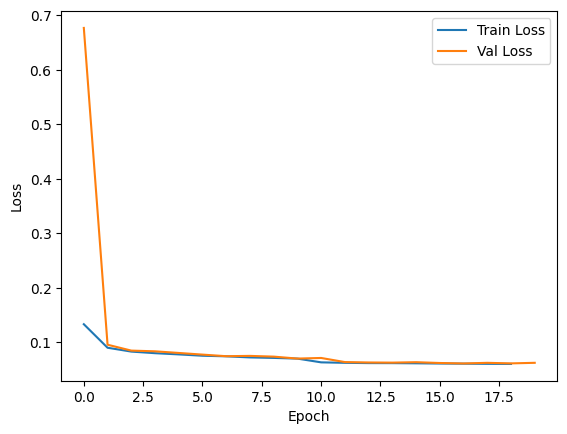

In [37]:
plt.plot(ae_trainer.train_losses, label='Train Loss')
plt.plot(ae_trainer.val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate on Testset

In [38]:
test_ae(autoencoder.to('cuda'), test_loader, nn.MSELoss(), device)

0.062179032577709716

## Visualize Model Output (8 points)


##### For each category in the test set:

1. Randomly select an image from that category.
2. Generate a reconstruction of the image.
3. Display the original image and its reconstruction side-by-side.


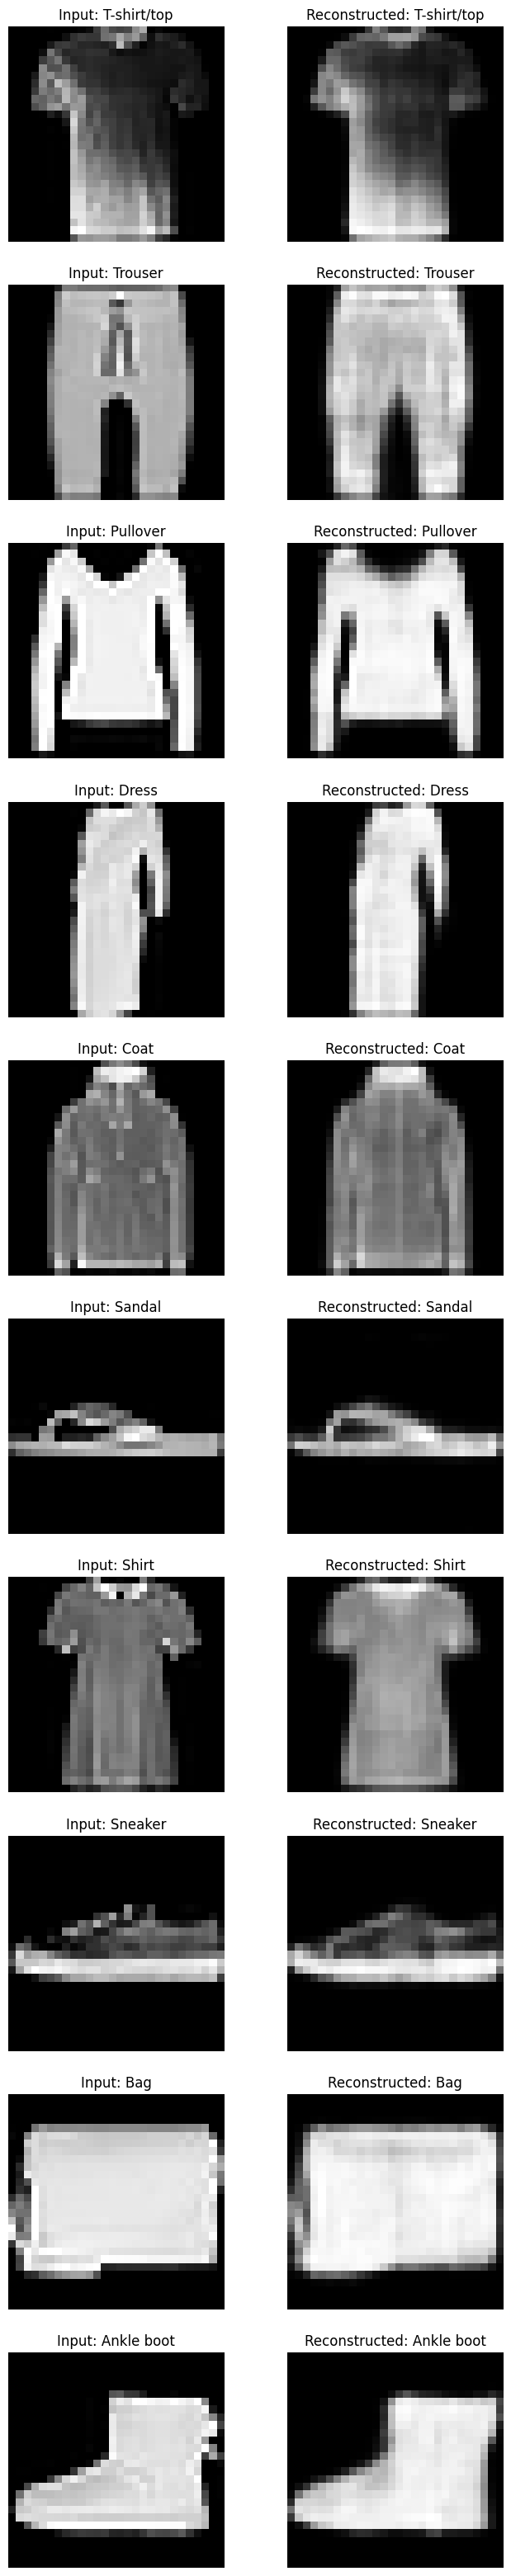

In [21]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

def visualize_input_reconstructed(autoencoder, test_loader, device, class_names):
    class_counter = 0
    class_data_dict = dict()
    for x_batch, y_batch in test_loader:
        for i, y in enumerate(y_batch):
            if class_data_dict.get(torch.argmax(y).item()) is None:
                class_data_dict[torch.argmax(y).item()] = x_batch[i]
                class_counter += 1

            if class_counter == len(class_names):
                break
        if class_counter == len(class_names):
            break
    # print(f'{list(class_data_dict.keys())=}')

    autoencoder = autoencoder.to(device)
    autoencoder.eval()
    with torch.no_grad():
        fig, ax = plt.subplots(len(class_names), 2, figsize=(8, 40))

        for i, label in enumerate(class_names):
            image = class_data_dict[i].to(device).unsqueeze(0)
            # print(f'{image.size()=}')
            image_ravel = image.view(image.size(0), -1)
            # print(f'{image_ravel.size()=}')
            output_ravel = autoencoder(image_ravel)
            # print(f'{output_ravel.size()=}')
            output = to_img(output_ravel)
            # print(f'{output.size()=}')


            ax[i, 0].imshow(image.detach().cpu().numpy().squeeze(), cmap='gray')
            ax[i, 0].set_title(f'Input: {label}')
            ax[i, 0].axis('off')
            ax[i, 1].imshow(output.detach().cpu().numpy().squeeze(), cmap='gray')
            ax[i, 1].set_title(f'Reconstructed: {label}')
            ax[i, 1].axis('off')

        plt.show()

visualize_input_reconstructed(autoencoder, test_loader, device, class_names)

## Visualize Embeddings (5 points)

Generate image embeddings for the test dataset.

In [22]:
print(f'{X_test.shape=}')

X_test.shape=(7000, 784)


In [23]:
embeddings = []
autoencoder = autoencoder.to('cuda')
autoencoder.eval()
with torch.no_grad():
    # TODO
    for x in X_test:
        x_tensor = torch.from_numpy(x).unsqueeze(0)
        output_batch = autoencoder.encoder(x_tensor.to('cuda'))
        embeddings.extend(output_batch.detach().cpu().numpy())

len(embeddings)

7000

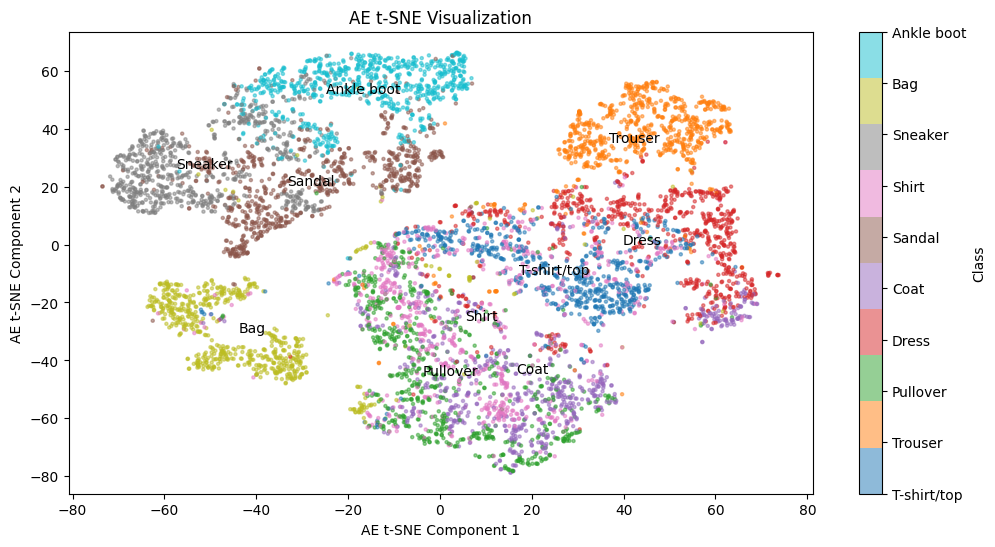

In [24]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)
embeddings_tsne = tsne.fit_transform(np.array(embeddings))
visualize_2d(embeddings_tsne, y_test, 'AE t-SNE')

# Train a Classifier (8 points)

In the previous part, we saw that the encoder has learned to project images into representations with semantic meaning. In this part, you will transfer the knowledge learned by the encoder to a classification task by adding classification layers on top of it. This is a common technique in transfer learning, and it can be used to improve the performance of a classifier on a new task, even if the classifier is trained on a limited amount of data

In [25]:
import copy
import torch.nn.functional as F
from torch.ao.nn.quantized.modules import activation


def get_encoder(autoencoder):
    # TODO: Instantiate a copy of the encoder from the trained autoencoder.
    # You are free to modify the arguments of this function.
    encoder = copy.deepcopy(autoencoder.encoder)
    return encoder


class Classifier(nn.Module):
    def __init__(self, encoder, num_classes):
        super(Classifier, self).__init__()
        self.encoder = encoder
        self.classifier_layer = nn.Sequential(
            # TODO
            nn.Linear(64, 32),
            nn.ReLU(True),
            # nn.Dropout(0.2),
            # nn.Linear(48, 32),
            # nn.ReLU(True),
            # nn.Dropout(0.2),
            nn.Linear(32, 24),
            nn.ReLU(True),
            # nn.Dropout(0.2),
            nn.Linear(24, 16),
            nn.ReLU(True),
            nn.Linear(16, 16),
            nn.ReLU(True),
            # nn.Dropout(0.2),
            nn.Linear(16, 10),
        )

    def freeze_parameters(self, module):
        for param in module.parameters():
            param.requires_grad = False

        return module

    def forward(self, x):
        # TODO
        code = self.encoder(x)
        output = self.classifier_layer(code)
        output = F.softmax(output, dim=-1)
        return output


encoder = get_encoder(autoencoder)
classifier = Classifier(encoder, 10)
classifier.to(device)

Classifier(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=250, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=64, bias=True)
  )
  (classifier_layer): Sequential(
    (0): Linear(in_features=64, out_features=32, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=32, out_features=24, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=24, out_features=16, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=16, out_features=16, bias=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=16, out_features=10, bias=True)
  )
)

## Training Loop (9 Points)

Implement the `train_clf_epoch`, `test_clf`, and `train_clf` functions. In the `test_clf` function, in addition to the loss, calculate and return the accuracy.


In [26]:
from torch import optim

def train_clf_epoch(model, train_loader, criterion, optimizer, scheduler, device):
    model.train()
    mean_loss = 0.0
    # TODO
    for img, y in train_loader:
        # print(f'{y[0]=}')
        optimizer.zero_grad()
        y = y.to(device)
        img = img.to(device)
        img = img.view(img.size(0), -1)

        output = model(img)
        # print(f'{output[0]=}')
        # print(f'{output.size()=}')
        # print(f'{y.size()=}')
        # print(f'{torch.argmax(output, dim=1)=}, {torch.argmax(y, dim=1)=}')
        loss = criterion(output, y.to(torch.float))
        mean_loss += loss.item()

        loss.backward()
        optimizer.step()
        # print(f'Batch Loss: {loss.item()}')
        # break

    mean_loss = mean_loss / len(train_loader)
    scheduler.step()

    return mean_loss


def test_clf(model, test_loader, criterion, device):
    mean_loss = 0.0
    tp_count = 0
    total_count = 0
    model.eval()
    # TODO
    with torch.no_grad():
        for img, y in test_loader:
            img = img.to(device)
            y = y.to(device)
            img = img.view(img.size(0), -1)
            output = model(img)
            loss = criterion(output, y.to(torch.float))
            mean_loss += loss.item()
            cmp_vec = torch.argmax(output, dim=1) == torch.argmax(y, dim=1)
            tp_count += sum(cmp_vec)
            total_count += len(cmp_vec)

    mean_loss = mean_loss / len(test_loader)

    accuracy = tp_count / total_count
    return mean_loss, accuracy.item()


def train_clf(model, train_loader, val_loader, num_epochs, device=device):
    learning_rate = 1e-3
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
    train_loss_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        train_loss = train_clf_epoch(model, train_loader, criterion, optimizer, scheduler, device)
        val_loss, val_acc = test_clf(model, val_loader, criterion, device)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val ACC: {100 * val_acc:.2f}")

        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

    return train_loss_history, val_loss_history, val_acc_history


clf_train_loss_history, clf_val_loss_history, clf_val_acc_history = train_clf(classifier, train_loader, val_loader, 50)

Epoch 1/50, Train Loss: 1.8783, Val Loss: 1.6755, Val ACC: 78.50
Epoch 2/50, Train Loss: 1.6657, Val Loss: 1.6381, Val ACC: 82.39
Epoch 3/50, Train Loss: 1.6389, Val Loss: 1.6364, Val ACC: 82.50
Epoch 4/50, Train Loss: 1.6298, Val Loss: 1.6190, Val ACC: 84.32
Epoch 5/50, Train Loss: 1.6244, Val Loss: 1.6183, Val ACC: 84.23
Epoch 6/50, Train Loss: 1.6220, Val Loss: 1.6270, Val ACC: 83.30
Epoch 7/50, Train Loss: 1.6194, Val Loss: 1.6259, Val ACC: 83.41
Epoch 8/50, Train Loss: 1.6196, Val Loss: 1.6290, Val ACC: 83.28
Epoch 9/50, Train Loss: 1.6129, Val Loss: 1.6143, Val ACC: 84.66
Epoch 10/50, Train Loss: 1.6155, Val Loss: 1.6204, Val ACC: 84.08
Epoch 11/50, Train Loss: 1.5993, Val Loss: 1.6074, Val ACC: 85.27
Epoch 12/50, Train Loss: 1.5980, Val Loss: 1.6091, Val ACC: 85.21
Epoch 13/50, Train Loss: 1.5946, Val Loss: 1.6030, Val ACC: 85.86
Epoch 14/50, Train Loss: 1.5947, Val Loss: 1.6009, Val ACC: 85.97
Epoch 15/50, Train Loss: 1.5940, Val Loss: 1.6044, Val ACC: 85.59
Epoch 16/50, Train 

## Visualize Losses

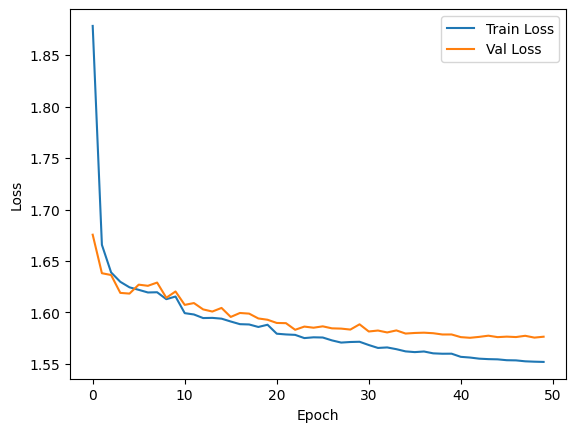

In [27]:
plt.plot(clf_train_loss_history, label='Train Loss')
plt.plot(clf_val_loss_history, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualize Validation Accuracy

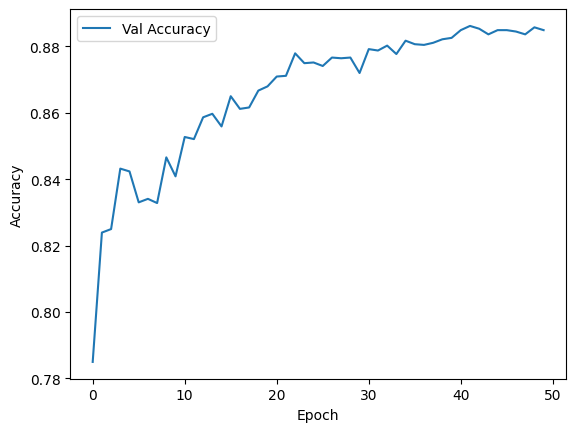

In [28]:
plt.plot(clf_val_acc_history, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Evaluate on Testset (20 points)

Your model must achieve an accuracy of at least 90% on the test set to receive full marks.

In [29]:
test_loss, test_acc = test_clf(classifier, test_loader, nn.CrossEntropyLoss(), device)

print(f"Test Loss: {test_loss:.4f}, Test ACC: {100 * test_acc:.2f}")

Test Loss: 1.5787, Test ACC: 88.21


In [30]:
torch.save(autoencoder, 'autoencoder.ckpt')
torch.save(classifier, 'classifer.ckpt')

In [31]:
!zip deep_hw1_checkpoints.zip autoencoder.ckpt classifer.ckpt

  adding: autoencoder.ckpt (deflated 7%)
  adding: classifer.ckpt (deflated 7%)
